## Lab 5-6

In this task we will explore data for extracting meaningful pattern from the data.

1. Download the Iris Data (https://archive.ics.uci.edu/ml/datasets/Iris). There are 4 attribute in this data set. Generate scatter plot matrix to identify relationship among different variables.

2. With the above data set, find out which class is linearly separable.

3. Use exploratory data analysis of the data set attached - WineQT.csv

Use different explanatory graphics to present your exploratory findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## 1. Iris Data

In [2]:
d1 = pd.read_csv("iris.data")
# rename the columns
new_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Class"]
d1.columns = new_columns
d1.head()

sepal_length  sepal_width  petal_length  petal_width        Class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa

In [3]:
d1.Class.value_counts()

Class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

#### Scatter plot matrix

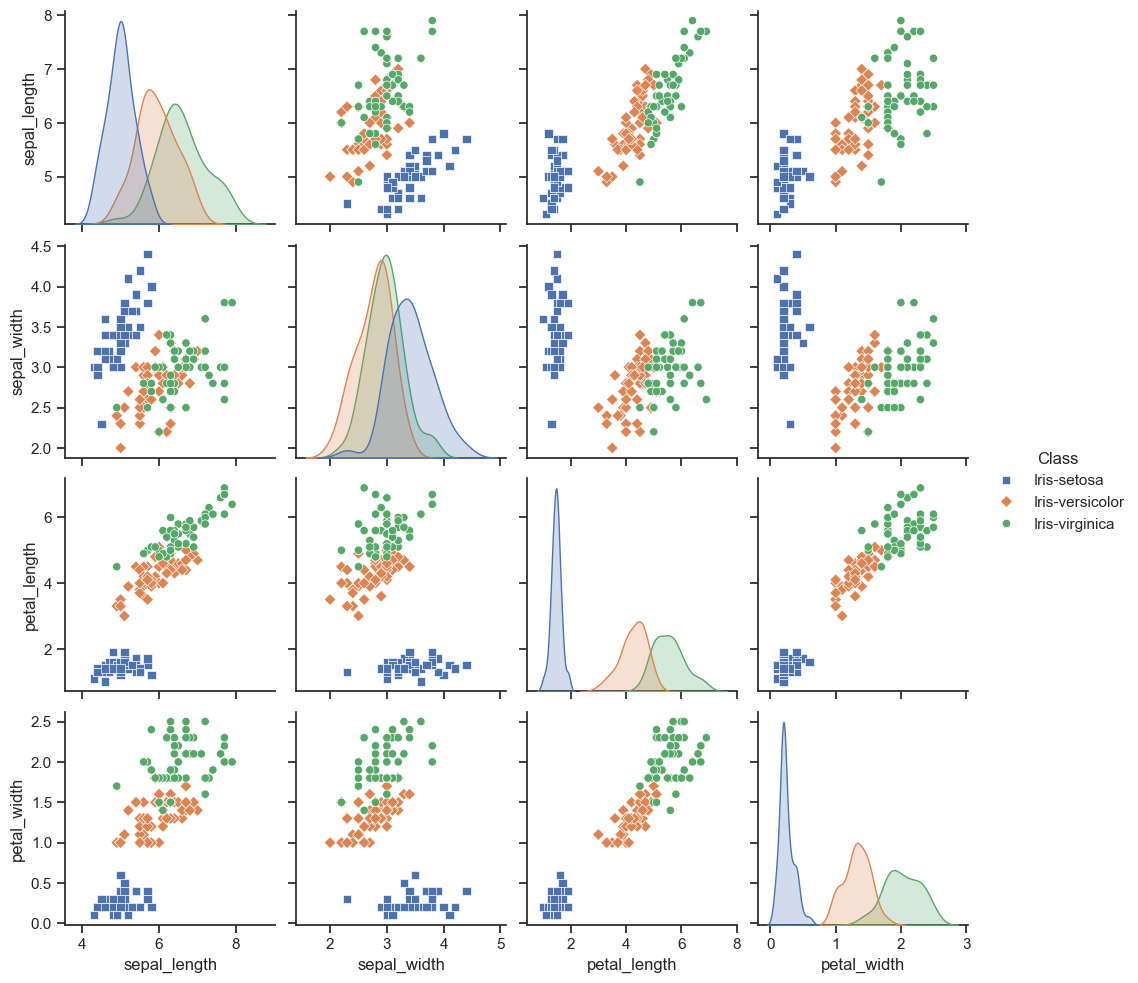

In [4]:
sns.set(style="ticks")
sns.pairplot(d1, hue="Class", markers=["s", "D","o"])
plt.show()

## 2. Linearly separable class in iris.data

In [5]:

class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
d1["Class"] = d1["Class"].map(class_mapping)

X = d1.drop("Class", axis=1)
y = d1["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9333333333333333


#### - We say that classes are  separable if there's a classifier whose decision boundary separates a class from another class.
#### - From the accuracy as well as from the scatter plot we can infer that all 3 classes are linearly sepearable. "Iris-setosa" class is easily seperable from other 2 classes as visible in the plot using a straight line. Whereas the other 2 classes "Iris-versicolor", "Iris-virginica" most of the part are easily distinguisiable, where are few points are coinciding .
#### - So from scatter plot matrix we infer that  "Iris-setosa" class is easily seperable from other two.

## 3. Data analysis of WineQT dataset

In [6]:

d2 = pd.read_csv("WineQT.csv")
d2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [7]:
(d2.isnull() | d2.isna()).sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
d2.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [9]:
d2 = d2.drop('Id', axis=1)


### Barplot 

[Text(0.5, 1.0, 'Night price distribution of Airbnb appartements')]

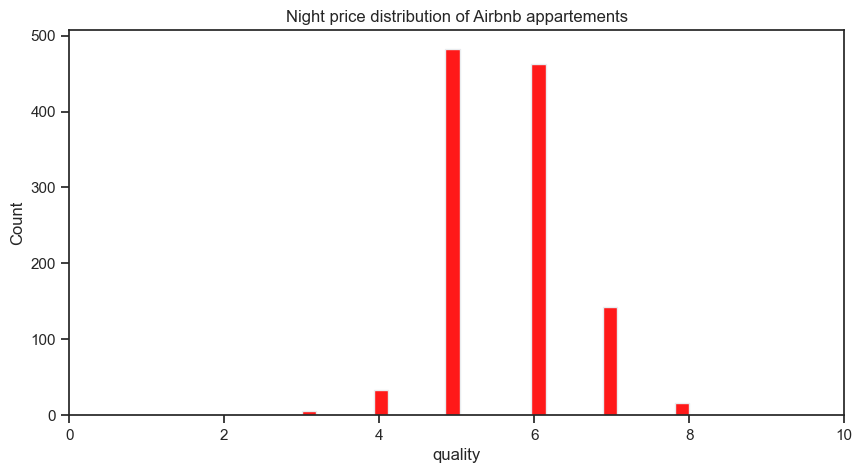

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
a1 = sns.histplot(data=d2, x='quality', color='red', edgecolor='#e9ecef', alpha=0.9)
#data=filtered_data, x='price', bins=range(0, 310, 10), color='#69b3a2', edgecolor='red', alpha=0.9

a1.set_xlim(0,10)
a1.set(title='Night price distribution of Airbnb appartements')

In [11]:
d2.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

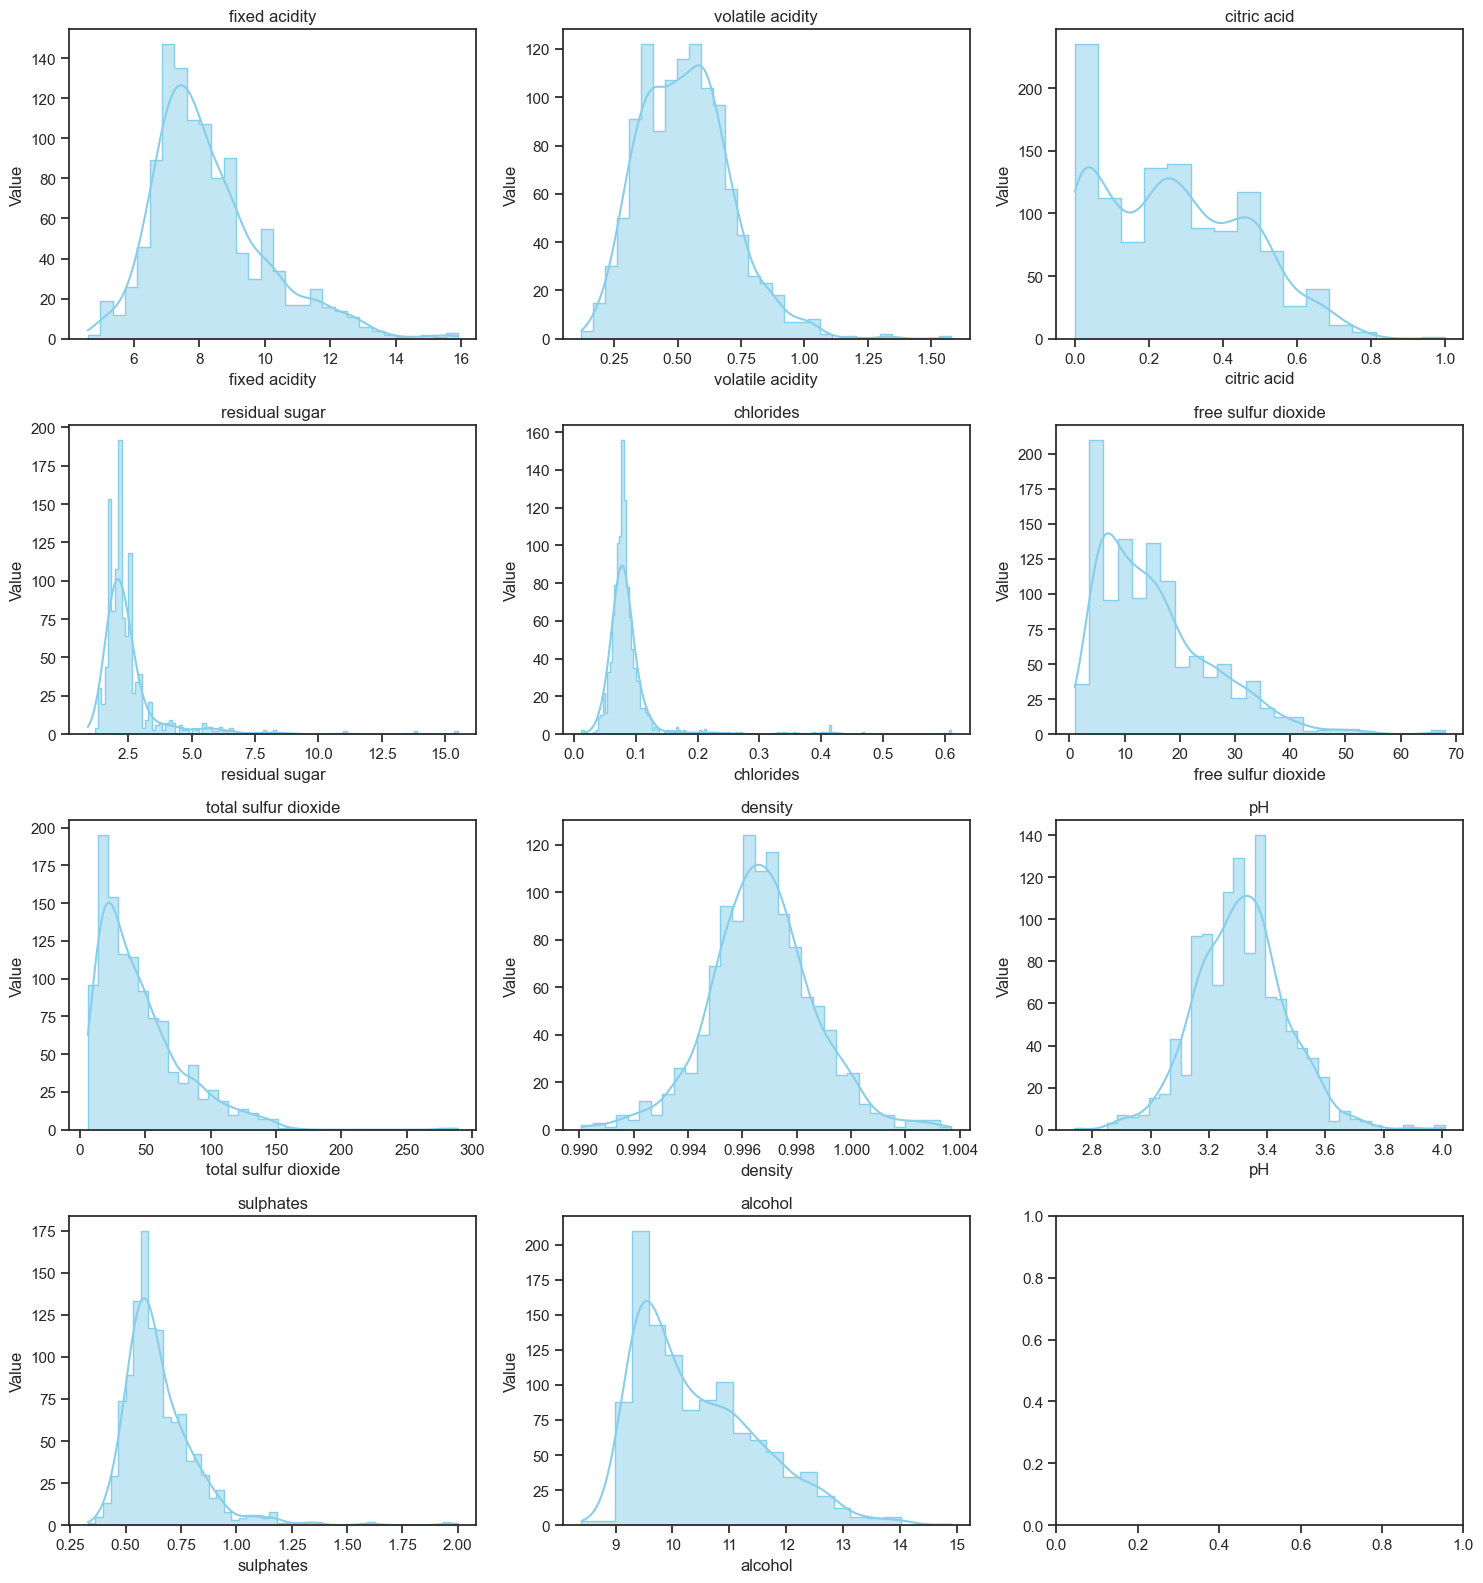

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = len(d2.columns[:])

num_rows = (num_cols + 2) // 3 

fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

axs = axs.flatten()

for i, col_nam in enumerate(d2.columns[:-1]):
    sns.histplot(data=d2, x=col_nam, kde=True, element='step', color="skyblue", ax=axs[i])
    axs[i].set_title(col_nam)
    axs[i].set(xlabel=col_nam, ylabel='Value')

plt.tight_layout()

# Show the plots
plt.show()


### correlation matrix/ Heatmap

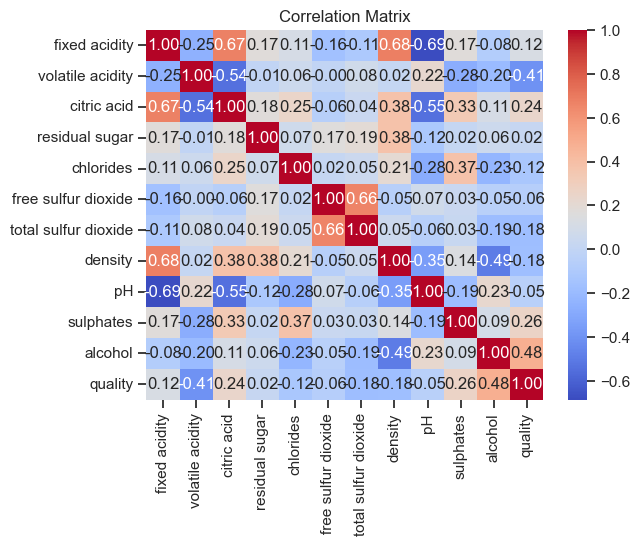

In [13]:

correlation_matrix = d2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Pairplot

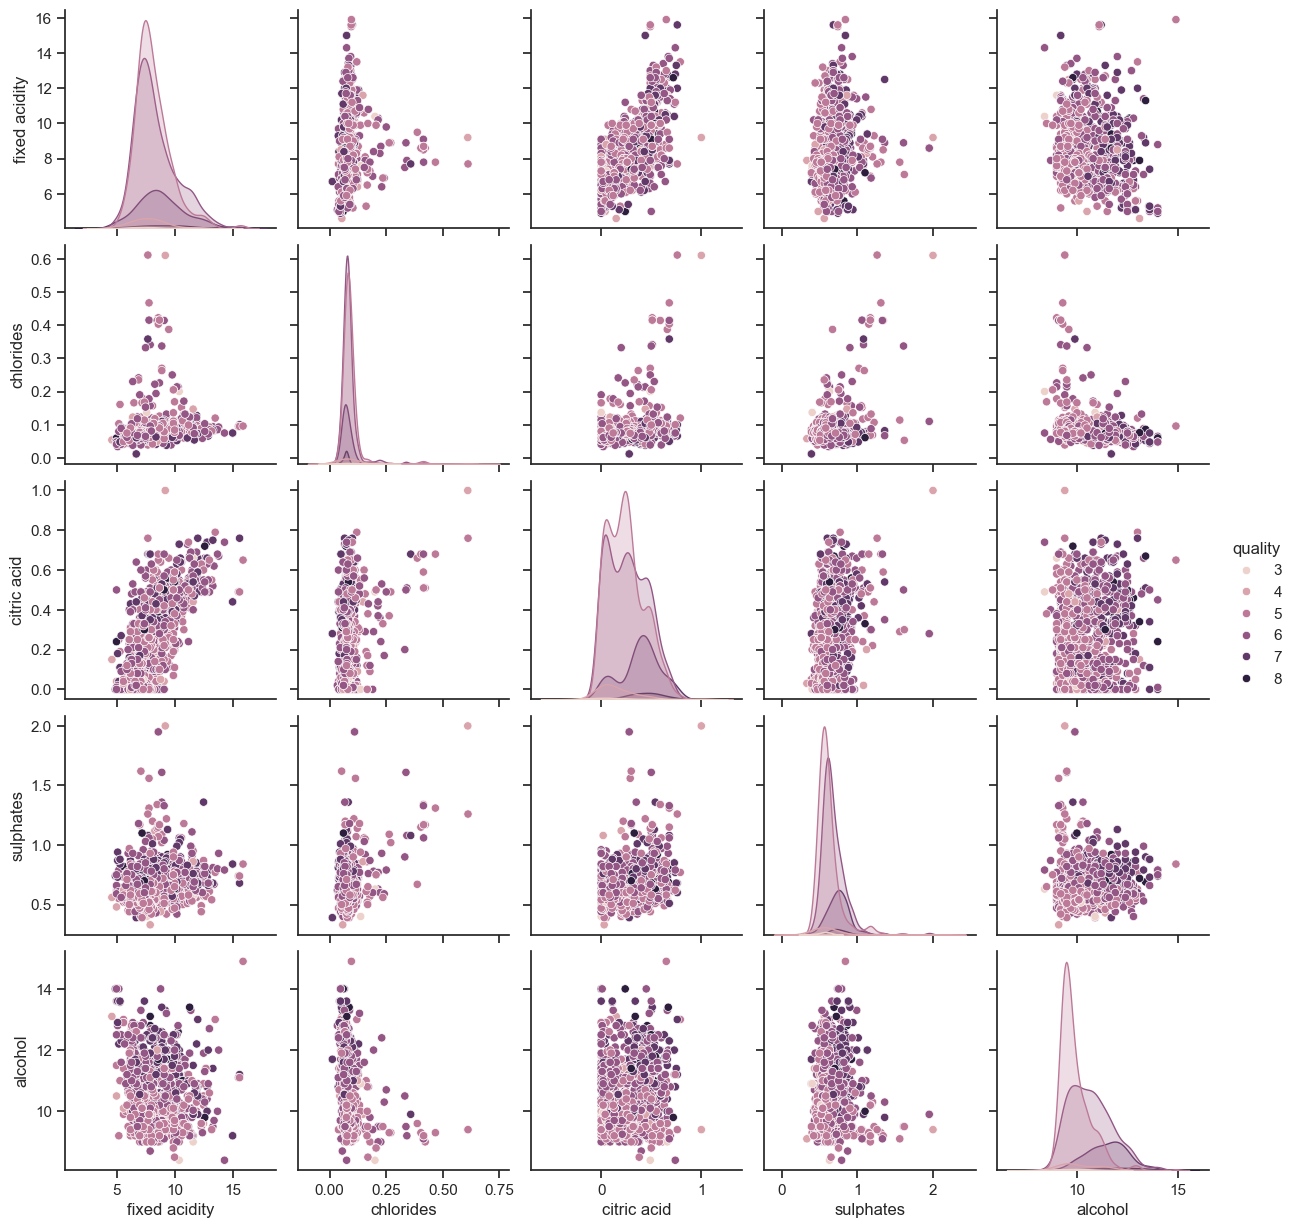

In [14]:

sns.pairplot(d2, vars=['fixed acidity', 'chlorides', 'citric acid', 'sulphates', 'alcohol'], hue='quality')
plt.show()


### Density plot

Here I plotted density plot of "pH" and "citric acidity" as has -0.55 as correlation , so to understand the relation and their dependancy

In [15]:
d2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 1.0, 'Density 2d: raster')

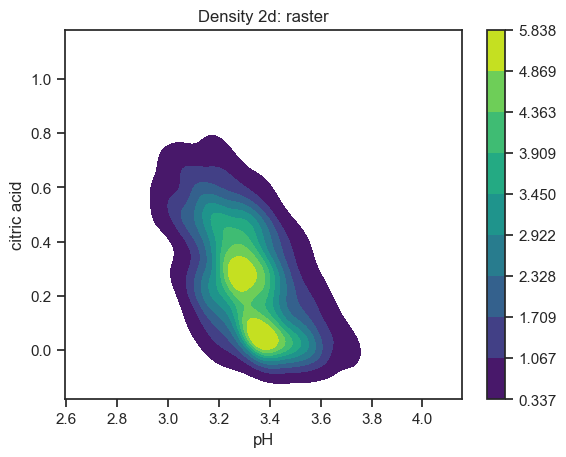

In [16]:
p4 = sns.kdeplot(x='pH', y='citric acid', data=d2, fill=True, cmap="viridis", cbar=True)
p4.set_title('Density 2d: raster')


Here I plotted density plot of "total sulfur dioxide" and "free sulfur dioxide" as has 0.66 as correlation 

Text(0.5, 1.0, 'Density 2d: raster')

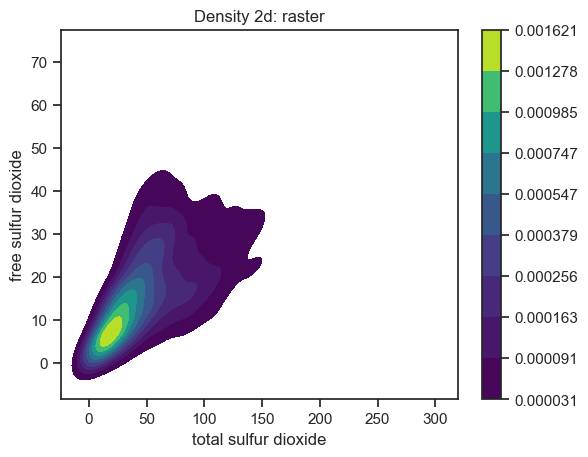

In [17]:
p4 = sns.kdeplot(x='total sulfur dioxide', y='free sulfur dioxide', data=d2, fill=True, cmap="viridis", cbar=True)
p4.set_title('Density 2d: raster')


Here I plotted density plot of "pH" and "alcohol" as has 0.28 as correlation 

Text(0.5, 1.0, 'Density 2d: raster')

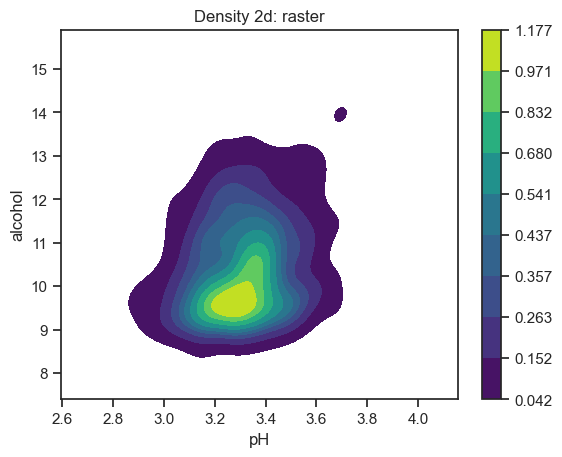

In [18]:
p4 = sns.kdeplot(x='pH', y='alcohol', data=d2, fill=True, cmap="viridis", cbar=True)
p4.set_title('Density 2d: raster')


### Preprocessing

In [19]:
# getting column with high correlation
for a in range(len(d2.corr().columns)):
    for b in range(a):
        if d2.corr().iloc[a,b] > 0.6:
            name = d2.corr().columns[a]
            print(name)
            
# deleting column with high coerr
columns_to_delete = ['citric acid','total sulfur dioxide','density']
d2 = d2.drop(columns=columns_to_delete)

citric acid
total sulfur dioxide
density


In [20]:
df=d2.copy()

In [21]:
# creating copy of the data
df=d2.copy()
# creating new col on the basis of quality
df['highQ'] = (df['quality'] > 6).astype(int)
#df['highQ'] = pd.cut(d2['quality'], bins=[-float('inf'), 4, 6, float('inf')], labels=[0, 1, 3], right=False)


# Dropping the original 'quality' column if you don't need it

c=['quality']
df=df.drop(columns=c)
df.head()

fixed acidity  volatile acidity  residual sugar  chlorides  \
0            7.4              0.70             1.9      0.076   
1            7.8              0.88             2.6      0.098   
2            7.8              0.76             2.3      0.092   
3           11.2              0.28             1.9      0.075   
4            7.4              0.70             1.9      0.076   

   free sulfur dioxide    pH  sulphates  alcohol  highQ  
0                 11.0  3.51       0.56      9.4      0  
1                 25.0  3.20       0.68      9.8      0  
2                 15.0  3.26       0.65      9.8      0  
3                 17.0  3.16       0.58      9.8      0  
4                 11.0  3.51       0.56      9.4      0

### Splitting of dataset

In [22]:

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [23]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

#### PCA for dimension reduction

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)

df_train_pca = pd.DataFrame(data=X_train_pca, columns=['PC 1', 'PC 2'])
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(df_train_pca, y_train)
X_test_pca = pca.transform(x_test)

# Make predictions using the Random Forest classifier
y_pred = clf.predict(X_test_pca)

accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333


C:\Users\RAmsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
d2.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Random forest classifier

In [26]:

clf=RandomForestClassifier(n_estimators=10, random_state=42)

clf.fit(x_train,y_train)
scores=cross_val_score(clf,x_train,y_train,cv=5)
scores
print("mean :  ",round(scores.mean(), 2))
print("SD : ",round(scores.std(), 2))


mean :   0.88
SD :  0.01


In [27]:
y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.986870897155361


In [28]:
y_pred_test = clf.predict(x_test)

accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy2)

Test Accuracy: 0.8777292576419214


### Decision tree classifier

In [29]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [30]:

dtc = DecisionTreeClassifier()
# fitting on model
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [31]:
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)
accuracy3=accuracy_score(y_test, y_test_pred)
print("Accuracy : ",accuracy3)
confusion_matrix(y_test, y_test_pred)

Accuracy :  0.8777292576419214


array([[177,  15],
       [ 13,  24]], dtype=int64)

Accuracy

In [32]:
print("Accuracy by Random forest  : ",accuracy2)
print("Accuracy by Random forest with PCA : ",accuracy1)
print("Accuracy by Decision tree : ",accuracy3)

Accuracy by Random forest  :  0.8777292576419214
Accuracy by Random forest with PCA :  0.8558951965065502
Accuracy by Decision tree :  0.8777292576419214
